# Title : Analyzing Air Quality Index (AQI) Trends in a City

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings

In [2]:
# Supressing update warnings
warnings.filterwarnings('ignore') 

In [5]:
data = pd.read_csv("data.csv", encoding="cp1252") 
data

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [7]:
# Cleaning up name changes
data.state = data.state.replace({'Uttaranchal':'Uttarakhand'}) 
data.state[data.location == "Jamshedpur"] = data.state[data.location == 'Jamshedpur'].replace({"Bihar":"Jharkhand"})

In [8]:
# Changing types to uniform format
types = {
    "Residential": "R", 
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO", 
    "Industrial Area": "I",
    "Industrial Areas": "I", 
    "Industrial": "I", 
    "Sensitive Area": "S", 
    "Sensitive Areas": "S", 
    "Sensitive": "S", 
    np.nan: "RRO"
}

data.type = data.type.replace(types) 
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [9]:
# defining columns of importance, which shall be used reguarly 
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [10]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
data[VALUE_COLS] = imputer.fit_transform(data[VALUE_COLS])

In [11]:
# checking to see if the dataset has any null values left over and the format 
print(data.isnull().sum())
data.tail()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435741,NaN,NaN,Tripura,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN


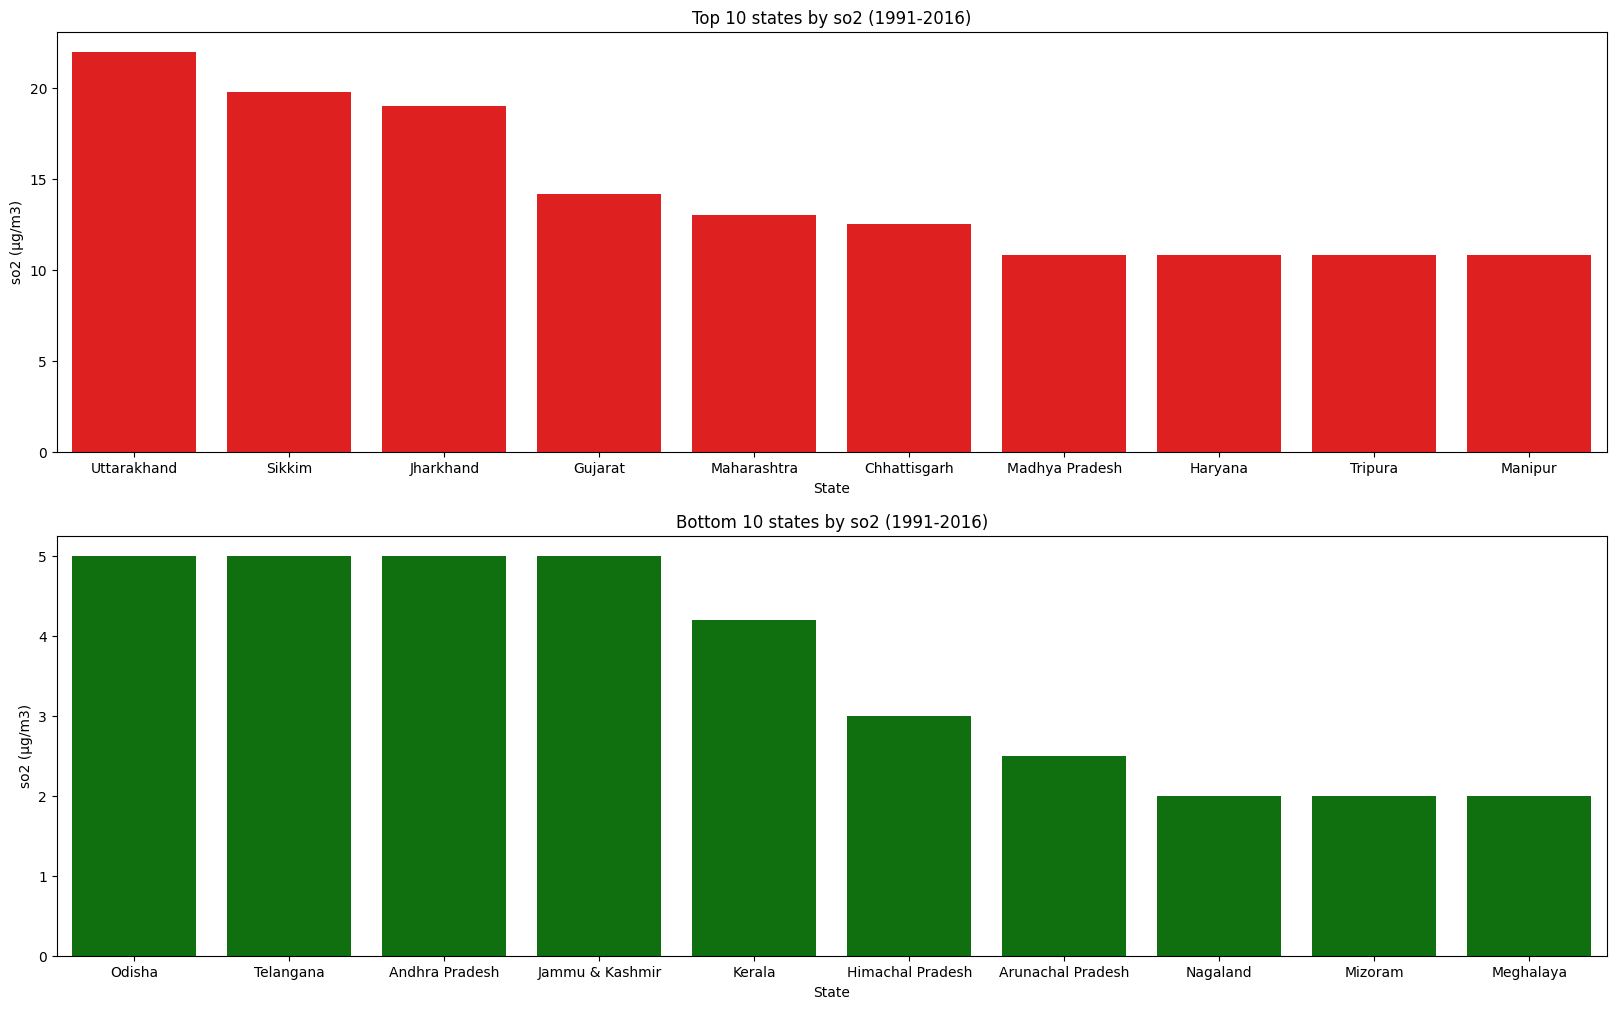

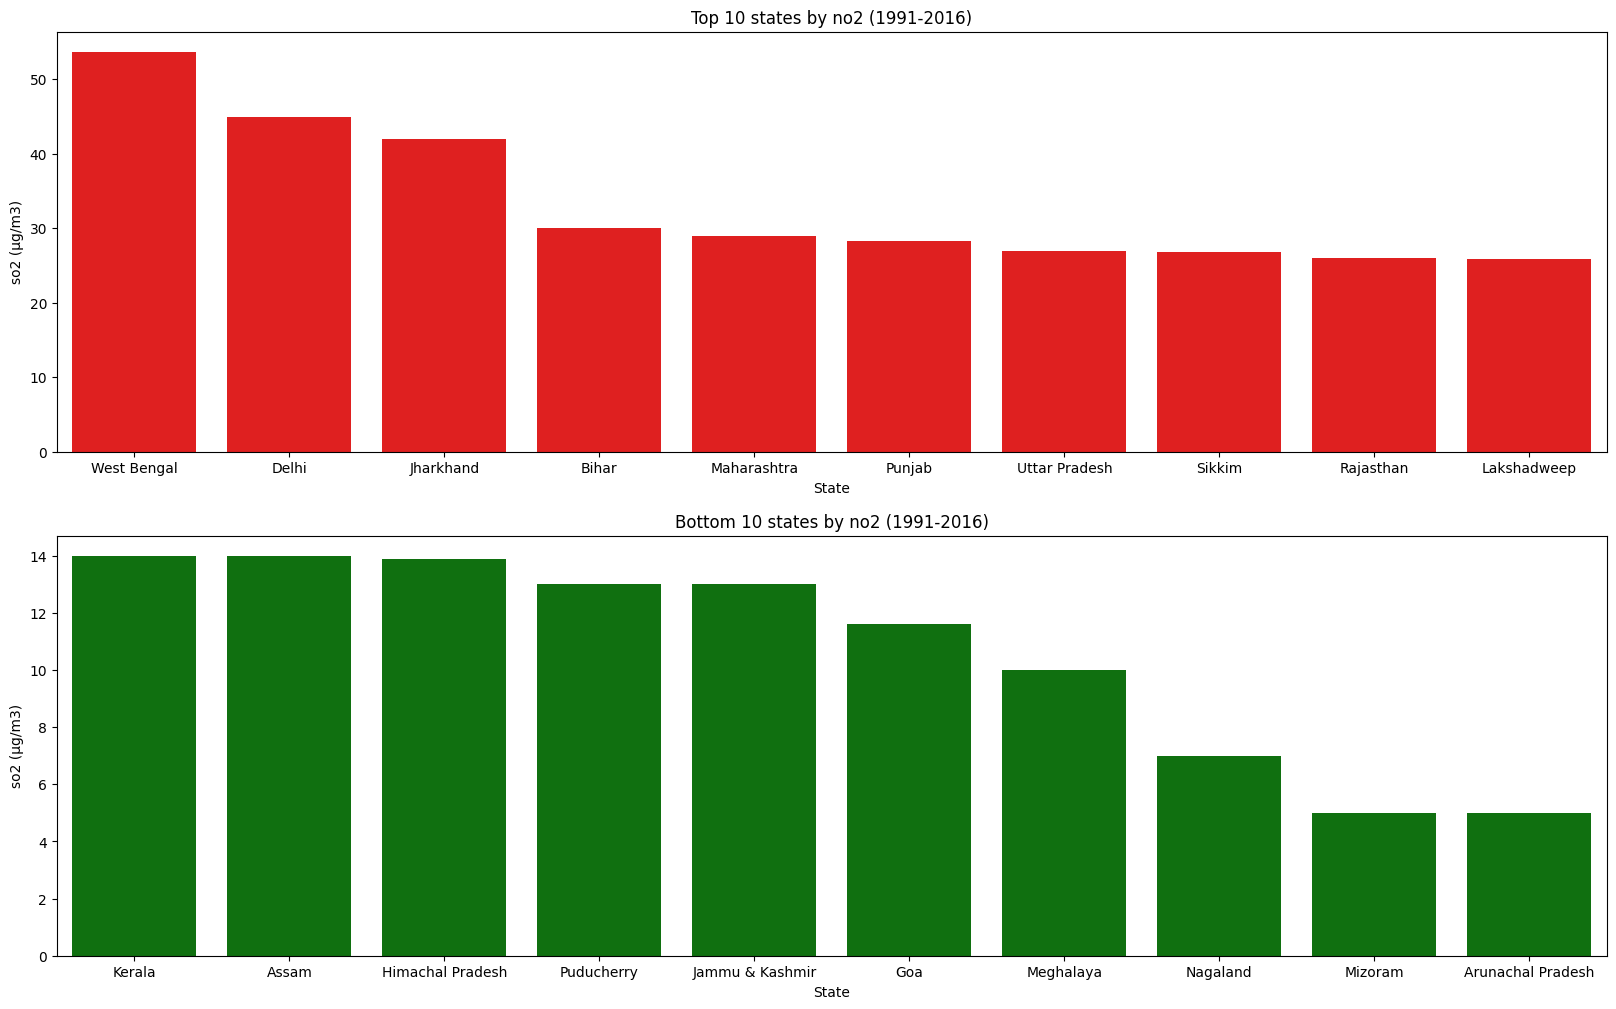

In [12]:
# Plotting highest and lowest ranking states
# defining a function to find and plot the top 10 and bottom 10 states for a given indicator (defaults to SO2) 
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2,1, figsize=(20, 12))
    ind = data[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator,ascending=False)
    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red') 
    top10.set_title("Top 10 states by {} (1991-2016)".format(indicator)) 
    top10.set_ylabel("so2 (µg/m3)")
    top10.set_xlabel("State")
    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='green') 
    bottom10.set_title("Bottom 10 states by {} (1991-2016)".format(indicator)) 
    bottom10.set_ylabel("so2 (µg/m3)")
    bottom10.set_xlabel("State") 

top_and_bottom_10_states("so2") 
top_and_bottom_10_states("no2")

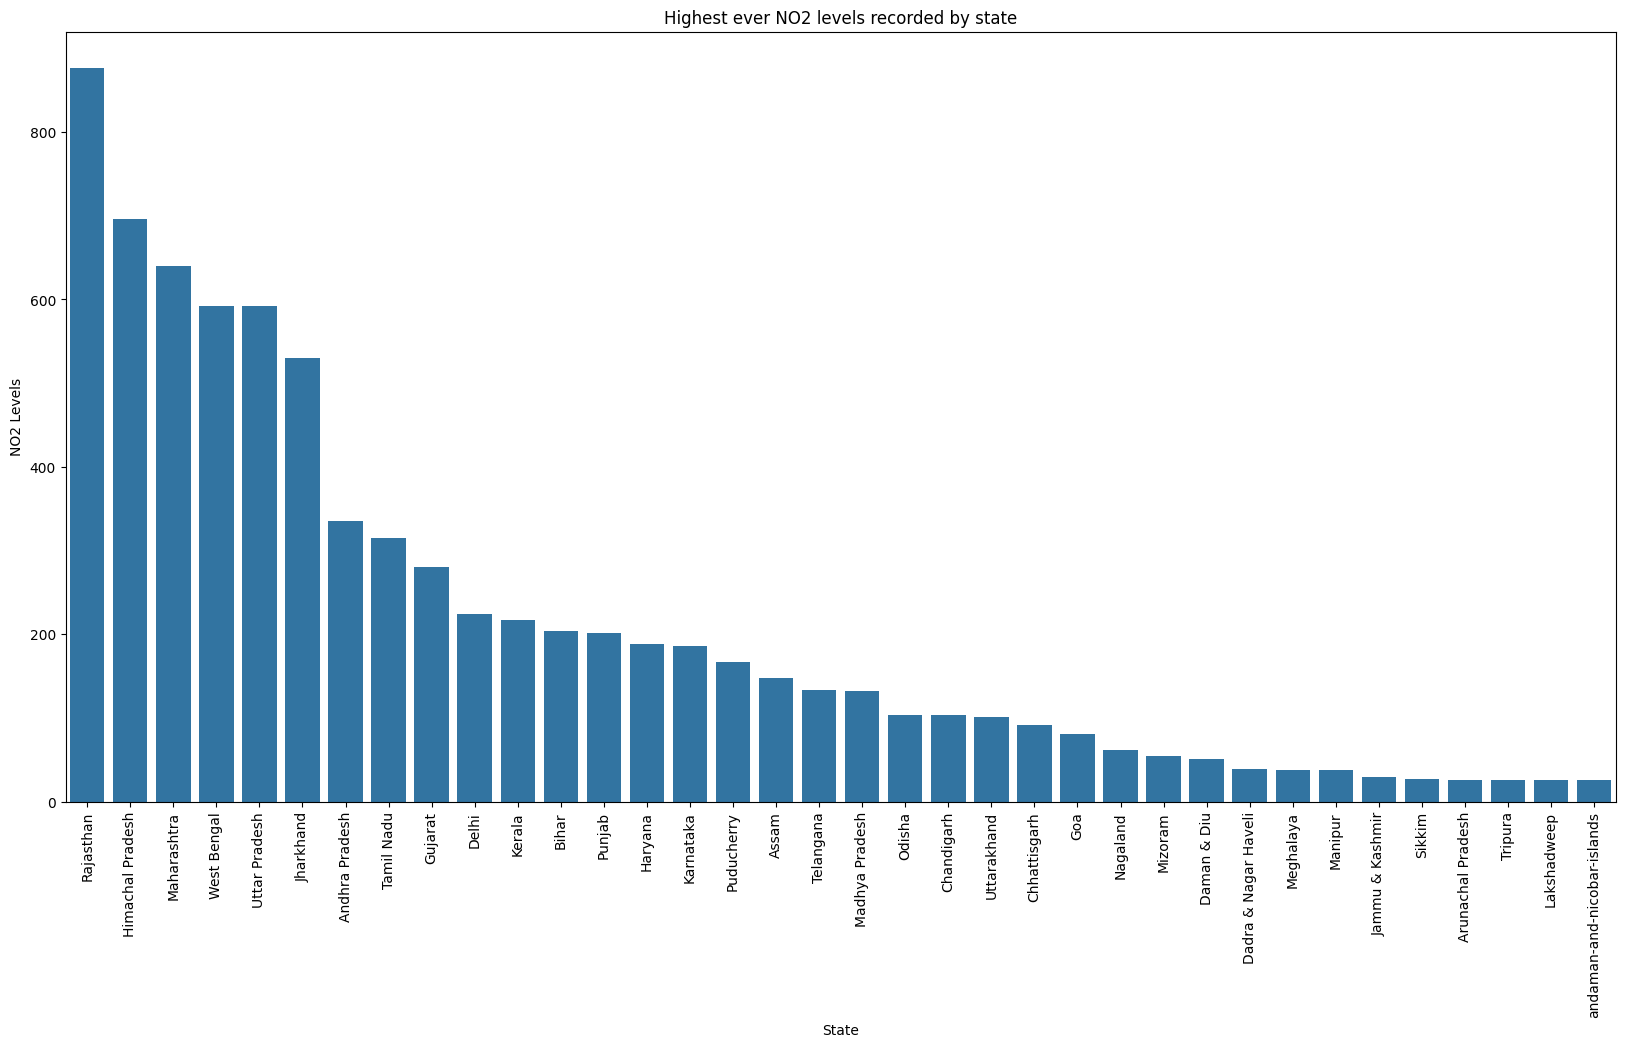

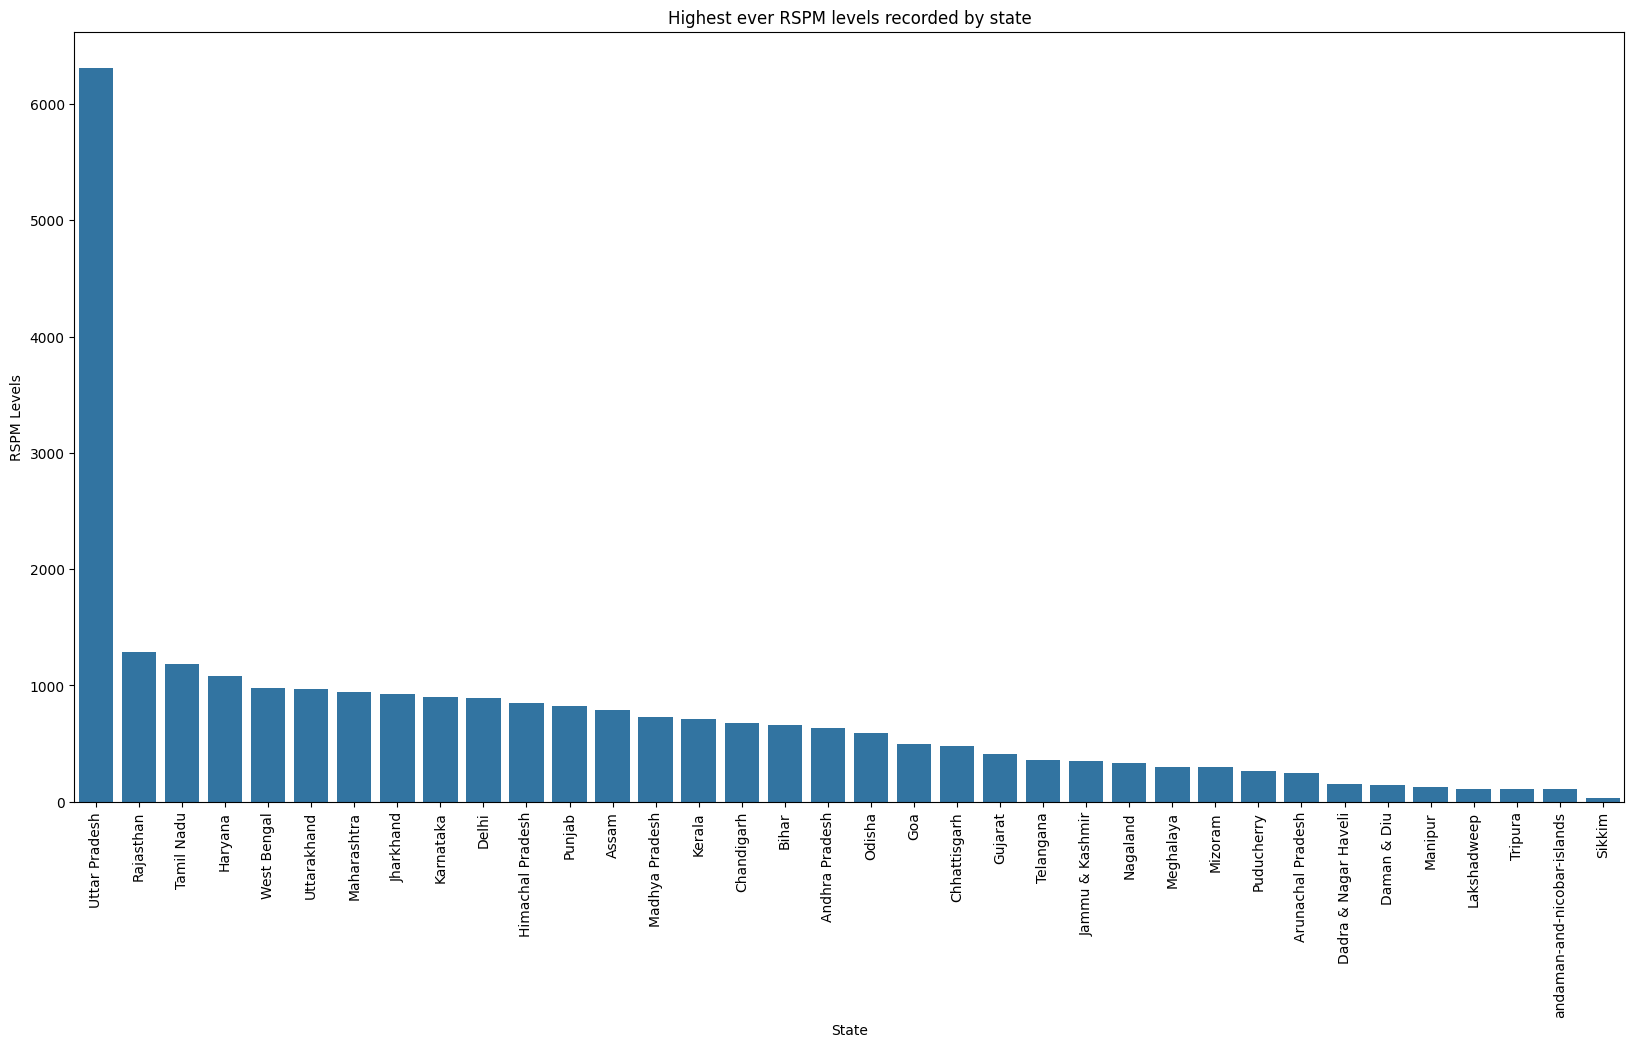

In [16]:
# Plotting the highest ever recorded levels
# defining a function to find the highest ever recorded levels for a given indicator (defaults to SO2) by state 
# sidenote: mostly outliers
def highest_levels_recorded(indicator="so2"):
    # Extracting only the relevant columns
    plt.figure(figsize=(20, 10))

    # Grouping by 'state' and applying 'max' on the indicator column
    ind = data.groupby('state', as_index=False).agg({indicator: 'max', 'location': 'first', 'date': 'first'})

    # Plotting
    highest = sns.barplot(x='state', y=indicator, data=ind.sort_values(by=indicator, ascending=False))
    highest.set_title(f"Highest ever {indicator.upper()} levels recorded by state")
    plt.xticks(rotation=90)
    plt.ylabel(f"{indicator.upper()} Levels")
    plt.xlabel("State")
    plt.show()

# Testing with different indicators
highest_levels_recorded("no2")
highest_levels_recorded("rspm")

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

def type_avg(indicator=""):
    # Ensure that only numeric columns are selected for averaging
    numeric_data = data.select_dtypes(include='number')  # Select numeric columns
    
    # Adding 'type' and 'date' columns back for grouping
    numeric_data = pd.concat([numeric_data, data[['type', 'date']]], axis=1)
    
    # Group by 'type' and calculate the mean of numeric columns
    type_avg = numeric_data.groupby("type").mean()
    
    # Check if the indicator is valid (exists in the columns)
    if indicator and indicator in type_avg.columns:
        # Plotting the specific indicator
        t = type_avg[indicator].plot(kind='bar')
        plt.title(f"Pollutant average by type for {indicator.upper()}")
    else:
        # Plotting all numeric indicators
        t = type_avg.plot(kind='bar')
        plt.title("Pollutant average by type")
    
    # Customize plot appearance
    plt.xticks(rotation=0)
    plt.ylabel("Average Levels")
    plt.xlabel("Pollutant Type")
    plt.show()

# Example usage
type_avg('so2')


TypeError: agg function failed [how->mean,dtype->object]

In [22]:
# Plotting pollutant averages by locations/state
# defining a function to plot pollutant averages for a given indicator (defaults to SO2) by locations in a given state 
def location_avgs(state, indicator="so2"):
    locs = data[VALUE_COLS + ['state', 'location', 'date']].groupby(['state', 'location']).mean() 
    state_avgs = locs.loc[state].reset_index()
    sns.barplot(x='location', y=indicator, data=state_avgs) 
    plt.title("Location-wise average for {} in {}".format(indicator, state)) 
    plt.xticks(rotation = 90)

location_avgs("Bihar", "no2")

TypeError: agg function failed [how->mean,dtype->object]